In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


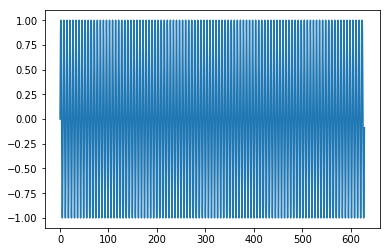

In [2]:
x = np.array(list(range(0,36000,5)))*np.pi/180
y = np.sin(x)
plt.plot(x,y)

In [6]:
num_units = 20
output_cols = 1
input_cols = 1
iterations = 1000
batch_size = 256
# A simple network to train sine curve
input_placeholder = tf.placeholder(dtype=tf.float32,shape=(None,input_cols),name="input_placeholder")
output_placeholder = tf.placeholder(dtype=tf.float32,shape=(None,output_cols),name="output_placeholder")

with tf.variable_scope("scope",reuse=tf.AUTO_REUSE) as sc:
    W1 = tf.get_variable(name="W1",shape=(input_cols,num_units),dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable(name="b1",shape=(num_units,),dtype=tf.float32, initializer=tf.initializers.zeros())
    
    hidden_ouput = tf.nn.relu(tf.matmul(input_placeholder,W1) + b1)
    
    W2 = tf.get_variable(name="W2",shape=(num_units,output_cols),dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable(name="b2",shape=(output_cols,),dtype=tf.float32, initializer=tf.initializers.zeros())
    
    preds = tf.nn.sigmoid(tf.matmul(hidden_ouput,W2) + b2)
    loss = tf.nn.l2_loss(preds - output_placeholder)
    
    optim = tf.train.AdamOptimizer()
    grads = optim.compute_gradients(loss, tf.trainable_variables(),aggregation_method=tf.AggregationMethod.ADD_N)
    grad_norm = tf.linalg.global_norm(t_list=grads,name="global_norm")
    minimize_op=optim.apply_gradients(grads)

grad_norm  #<tf.Tensor 'scope_2/global_norm/global_norm:0' shape=() dtype=float32>
grads

[(<tf.Tensor 'scope_3/gradients/scope_3/MatMul_grad/tuple/control_dependency_1:0' shape=(1, 20) dtype=float32>,
  <tf.Variable 'scope/W1:0' shape=(1, 20) dtype=float32_ref>),
 (<tf.Tensor 'scope_3/gradients/scope_3/add_grad/tuple/control_dependency_1:0' shape=(20,) dtype=float32>,
  <tf.Variable 'scope/b1:0' shape=(20,) dtype=float32_ref>),
 (<tf.Tensor 'scope_3/gradients/scope_3/MatMul_1_grad/tuple/control_dependency_1:0' shape=(20, 1) dtype=float32>,
  <tf.Variable 'scope/W2:0' shape=(20, 1) dtype=float32_ref>),
 (<tf.Tensor 'scope_3/gradients/scope_3/add_1_grad/tuple/control_dependency_1:0' shape=(1,) dtype=float32>,
  <tf.Variable 'scope/b2:0' shape=(1,) dtype=float32_ref>)]

In [ ]:
    
init = tf.global_variables_initializer()
with tf.Session() as s:
    s.run(init)
    for iteration in range(iterations):
        mini_batch_indices = np.random.random_integers(0, len(x),size=batch_size)
        x_train = x[mini_batch_indices]
        y_train = y[mini_batch_indices]
        x_train = np.reshape(x_train,(-1,input_cols))
        y_train = np.reshape(y_train,(-1,output_cols))
        
        feed_dict = dict()
        feed_dict[input_placeholder] = x_train
        feed_dict[output_placeholder] = y_train
        g,l = s.run([grads,minimize_op],feed_dict)
    

In [7]:
grads_and_vars = [("grad_wrt_Wx", "Wx"), ("grad_wrt_Wh", "Wh"), ("grad_wrt_b", "b")]
grad_list = list()
for g,v in grads_and_vars:
    grad_list.append(g)
    
grad_list   

['grad_wrt_Wx', 'grad_wrt_Wh', 'grad_wrt_b']

In [8]:
grad_vars = [(grad,var) for grad in grad_list for old_grad,var in grads_and_vars]
grad_vars

[('grad_wrt_Wx', 'Wx'),
 ('grad_wrt_Wx', 'Wh'),
 ('grad_wrt_Wx', 'b'),
 ('grad_wrt_Wh', 'Wx'),
 ('grad_wrt_Wh', 'Wh'),
 ('grad_wrt_Wh', 'b'),
 ('grad_wrt_b', 'Wx'),
 ('grad_wrt_b', 'Wh'),
 ('grad_wrt_b', 'b')]

In [11]:
list(zip(grad_list, grads_and_vars))

[('grad_wrt_Wx', ('grad_wrt_Wx', 'Wx')),
 ('grad_wrt_Wh', ('grad_wrt_Wh', 'Wh')),
 ('grad_wrt_b', ('grad_wrt_b', 'b'))]